# Capstone Project: Analysis of Stock price and forecasting using LSTM

## Rezoan Ahmed Shuvro

In [644]:
# Import libraries
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [620]:
# to collect the ticker names of SP 500 stocks from a saved xlx file
sp = pd.read_excel('SP500.xlsx')

In [265]:
ticker = sp.Symbol.values

In [267]:
ticker = list(ticker)

In [255]:
# Stock dataframe function
def stock_dataframe(x):
    '''
    given a list of stock tickers, the function will return a dataframe of stock measurures scrapping from 
    yahoo finance page
    '''
    new_df = pd.DataFrame()
    for idx,ticker in enumerate(x):
        url ='https://finance.yahoo.com/quote/'
        curr_url =url+ ticker
        table = pd.read_html(curr_url)
        y = [table[0].iloc[0][1],
             table[1].iloc[7][1],
             table[0].iloc[5][1].split('-')[0],
             table[0].iloc[5][1].split('-')[1],
             table[1].iloc[1][1],
             table[1].iloc[2][1],
             table[1].iloc[5][1].split()[0],
             table[1].iloc[5][1].split()[1],
             table[1][1][0]]
        df2 = pd.DataFrame({'ticker':ticker,'price':y[0],'estimate':y[1],'year_low':y[2],
                       'year_high':y[3],'beta':y[4],'pe_ratio':y[5],'dividend':y[6],
                      'yield':y[7],'market_cap':y[8]},index= [idx])
        new_df = pd.concat([new_df,df2])
    return new_df

In [269]:
stockdf2 = pd.DataFrame()
## WCG and BF.B has issues
for i in range(len(ticker)):
    stockdf1 = stock_dataframe(x = [ticker[i]])
    stockdf2 = pd.concat([stockdf2,stockdf1])


In [496]:
stocks = stockdf2.copy()

In [507]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, MSFT to NWS
Data columns (total 10 columns):
price         502 non-null float64
estimate      500 non-null float64
year_low      497 non-null float64
year_high     495 non-null float64
beta          491 non-null float64
pe_ratio      446 non-null float64
dividend      503 non-null float64
yield         503 non-null object
market_cap    502 non-null object
change        500 non-null float64
dtypes: float64(8), object(2)
memory usage: 43.2+ KB


In [497]:
stocks.price = stockdf2.price.apply(lambda x: float(x))
stocks.pe_ratio = stockdf2.pe_ratio.apply(lambda x: float(x))
stocks.estimate = stockdf2.estimate.apply(lambda x: float(x))

In [498]:
stocks['yield'] = stockdf2['yield'].str.replace(')','')
stocks['yield'] = stockdf2['yield'].str.replace('(','')


In [499]:
stocks.dividend =stockdf2.dividend.str.replace('N/A','0')

In [500]:
stocks['change'] = ((stocks.estimate - stocks.price)/stocks.price)*100

In [501]:
stocks.set_index('ticker',inplace=True)

In [504]:
stocks.beta = stocks.beta.astype(float)
stocks.year_high = pd.to_numeric(stocks.year_high,errors='coerce')
stocks.year_low = pd.to_numeric(stocks.year_low,errors='coerce')
stocks.dividend = pd.to_numeric(stocks.dividend,errors='coerce')

In [509]:
stocks['yield'] = stocks['yield'].replace('N/A',0)

In [521]:
def market_cap(x):
    if x[-1] == 'T':
        a = float(x[:-1])
        a= a*100000000000
    elif x[-1] == 'B':
        a = float(x[:-1])
        a= a*100000000
    elif x[-1] == 'M':
        a = float(x[:-1])
        a= a*1000000 
    return a

for i in range(len(stocks_filter)):
    if (type(stocks.market_cap.iloc[i])) == str:
        stocks.market_cap.iloc[i] = market_cap(stocks.market_cap.iloc[i])

In [522]:
type(stocks.market_cap.iloc[i])

float

In [524]:
stocks.head()

,price,estimate,year_low,year_high,beta,pe_ratio,dividend,yield,market_cap,change
ticker,,,,,,,,,,
MSFT,182.92,197.16,130.71,190.70,0.93,31.19,2.04,1.12%,1.42e+11,7.784824
AAPL,322.32,316.95,190.30,331.75,1.17,26.04,3.28,1.02%,1.437e+11,-1.666046
AMZN,2460.60,2675.96,NaN,NaN,1.32,118.60,0.00,0,1.238e+11,8.752337
FB,226.29,241.81,137.10,240.90,1.20,31.66,0.00,0,6.57487e+10,6.858456
BRK.B,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN


In [525]:
stocks.to_excel('stocks1.xlsx')

In [526]:
stocks_filter = stocks.copy()

In [536]:
filter = stocks_filter[(stocks_filter.market_cap> 10000000000) & (stocks_filter.beta < 1) 
              & (stocks_filter.change >10) & (stocks_filter.pe_ratio <30) & (stocks_filter.dividend >3)]

In [540]:
filter_tickers = list(filter.index)
filter_tickers.append('SPY')

In [548]:
import datetime 
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 5, 31)
spy = data.DataReader('spy', 'yahoo', start, end)

In [550]:
tick

'BRK.B'

In [572]:
tickers = list(filter_tickers)
print(tickers)

['JNJ', 'UNH', 'AMGN', 'PM', 'SPY']


In [576]:
# Start and End date of the stock prices
import datetime 
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 6,8)

JNJ= data.DataReader('JNJ', 'yahoo', start, end)
UNH= data.DataReader('UNH', 'yahoo', start, end)
AMGN= data.DataReader('AMGN', 'yahoo', start, end)
PM= data.DataReader('PM', 'yahoo', start, end)
SPY= data.DataReader('SPY', 'yahoo', start, end)


In [577]:
my_stocks = pd.concat([JNJ,UNH, AMGN,PM, SPY],axis=1, keys=tickers)

In [578]:
my_stocks.columns.names = ['ticker', 'info']
my_stocks.tail()

ticker             JNJ                                                 \
info              High         Low        Open       Close     Volume   
Date                                                                    
2020-06-01  148.339996  146.009995  147.289993  147.190002  6141800.0   
2020-06-02  148.350006  146.119995  147.059998  148.250000  6078300.0   
2020-06-03  149.139999  146.449997  148.520004  148.649994  6339500.0   
2020-06-04  148.369995  145.580002  146.800003  146.729996  8170500.0   
2020-06-05  149.639999  146.600006  147.690002  147.300003  9724300.0   

ticker                         UNH                                      \
info         Adj Close        High         Low        Open       Close   
Date                                                                     
2020-06-01  147.190002  305.980011  300.559998  304.019989  305.929993   
2020-06-02  148.250000  308.100006  301.730011  305.579987  306.309998   
2020-06-03  148.649994  310.119995  302.739990  307.850006  305.350006   
2020-06-04  146.729996  304.470001  294.290009  303.179993  298.079987   
2020-06-05  147.300003  314.279999  300.500000  304.000000  311.850006   

ticker         ...             PM                                   \
info           ...           Open      Close     Volume  Adj Close   
Date           ...                                                   
2020-06-01     ...      73.349998  73.790001  3309300.0  73.790001   
2020-06-02     ...      74.330002  73.730003  3869800.0  73.730003   
2020-06-03     ...      74.449997  74.209999  5182400.0  74.209999   
2020-06-04     ...      74.000000  75.190002  4206700.0  75.190002   
2020-06-05     ...      76.500000  75.910004  5395600.0  75.910004   

ticker             SPY                                                   \
info              High         Low        Open       Close       Volume   
Date                                                                      
2020-06-01  306.209991  303.059998  303.619995  305.549988   55758300.0   
2020-06-02  308.130005  305.100006  306.549988  308.079987   74267200.0   
2020-06-03  313.220001  309.940002  310.239990  312.179993   92567600.0   
2020-06-04  313.000000  309.079987  311.109985  311.359985   75794400.0   
2020-06-05  321.269989  317.160004  317.230011  319.339996  150362600.0   

ticker                  
info         Adj Close  
Date                    
2020-06-01  305.549988  
2020-06-02  308.079987  
2020-06-03  312.179993  
2020-06-04  311.359985  
2020-06-05  319.339996  

[5 rows x 30 columns]

In [581]:
#Latest stock price 

my_stocks.xs(key='Close',axis=1,level='info').reset_index()[my_stocks.reset_index().Date>'2020-06-04'].transpose()[1:]

,3882
ticker,
JNJ,147.3
UNH,311.85
AMGN,225.67
PM,75.91
SPY,319.34


In [582]:
#all time lowest stock price 

my_stocks.xs(key='Close',axis=1,level='info').min()

ticker
JNJ     46.599998
UNH     16.299999
AMGN    39.970001
PM      32.340000
SPY     68.110001
dtype: float64

In [583]:
# find the lowest price and ticker for each stock

pd.merge(pd.DataFrame(my_stocks.xs(key='Close',axis=1,level='info').idxmin()),
          pd.DataFrame(my_stocks.xs(key='Close',axis=1,level='info').min()),on='ticker')

,0_x,0_y
ticker,,
JNJ,2009-03-09,46.599998
UNH,2008-11-20,16.299999
AMGN,2008-03-19,39.970001
PM,2009-03-03,32.340000
SPY,2009-03-09,68.110001


In [584]:
# find the highest price and ticker for each stock 

pd.merge(pd.DataFrame(my_stocks.xs(key='Close',axis=1,level='info').idxmax()),
          pd.DataFrame(my_stocks.xs(key='Close',axis=1,level='info').max()),on='ticker')

,0_x,0_y
ticker,,
JNJ,2020-04-23,155.509995
UNH,2020-06-05,311.850006
AMGN,2019-12-16,243.199997
PM,2017-06-19,122.900002
SPY,2020-02-19,338.339996


In [585]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = my_stocks[tick]['Close'].pct_change()
returns.tail()

,JNJ Return,UNH Return,AMGN Return,PM Return,SPY Return
Date,,,,,
2020-06-01,-0.010487,0.003543,-0.012146,0.005862,0.004042
2020-06-02,0.007202,0.001242,-0.014058,-0.000813,0.008280
2020-06-03,0.002698,-0.003134,-0.012158,0.006510,0.013308
2020-06-04,-0.012916,-0.023809,-0.000543,0.013206,-0.002627
2020-06-05,0.003885,0.046196,0.021686,0.009576,0.025630


In [586]:
returns.idxmin()

JNJ Return    2018-12-14
UNH Return    2008-09-29
AMGN Return   2016-10-28
PM Return     2018-04-19
SPY Return    2020-03-16
dtype: datetime64[ns]

In [587]:
returns.idxmax()

JNJ Return    2008-10-13
UNH Return    2008-10-13
AMGN Return   2005-07-20
PM Return     2008-10-13
SPY Return    2008-10-13
dtype: datetime64[ns]

In [588]:
# standard deviation of the return 
returns.std() # risk profile

JNJ Return     0.010954
UNH Return     0.020493
AMGN Return    0.016803
PM Return      0.015245
SPY Return     0.012409
dtype: float64

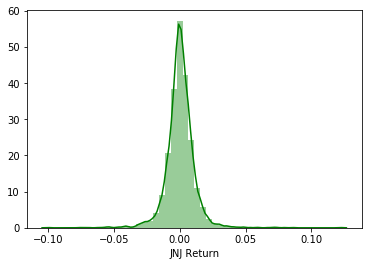

In [590]:
_=sns.distplot(returns.ix['2005-01-01':'2020-4-24']['JNJ Return'],color='green',bins=50)

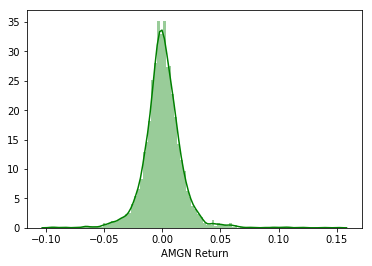

In [591]:
_=sns.distplot(returns.ix['2005-01-01':'2020-4-24']['AMGN Return'],color='green',bins=100)

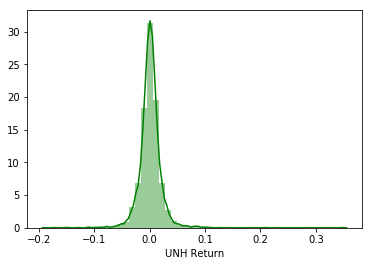

In [592]:
_=sns.distplot(returns.ix['2005-01-01':'2020-4-24']['UNH Return'],color='green',bins=50)

Text(0, 0.5, 'Stock price ($)')

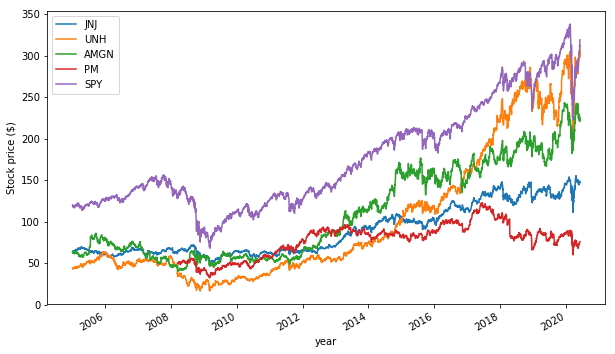

In [593]:
# daily stock closing price plot
for tick in tickers:
    my_stocks[tick]['Close'].plot(figsize=(10,6),label=tick)
plt.legend()
plt.xlabel('year')
plt.ylabel('Stock price ($)')

Text(0, 0.5, 'Stock price ($)')

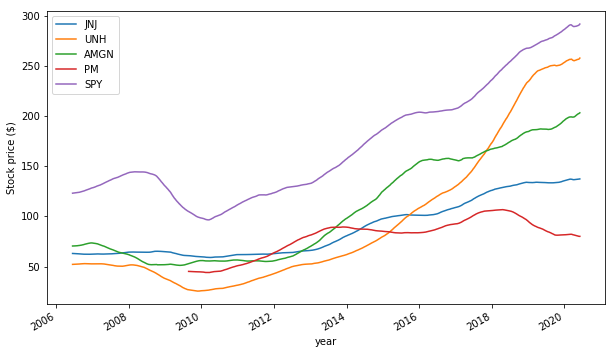

In [594]:
# 365 day rolloing average stock closing price plot
for tick in tickers:
    my_stocks[tick]['Close'].rolling(window=365).mean().plot(figsize=(10,6),label=tick)
plt.legend()
plt.xlabel('year')
plt.ylabel('Stock price ($)')

Text(0, 0.5, 'Stock price ($)')

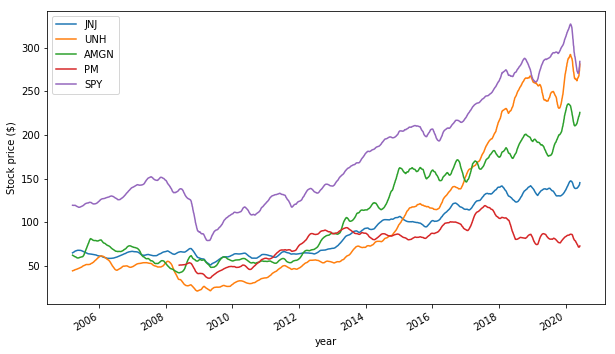

In [595]:
# 50 day stock closing price plot

for tick in tickers:
    my_stocks[tick]['Close'].rolling(window=50).mean().plot(figsize=(10,6),label=tick)
plt.legend()
plt.xlabel('year')
plt.ylabel('Stock price ($)')

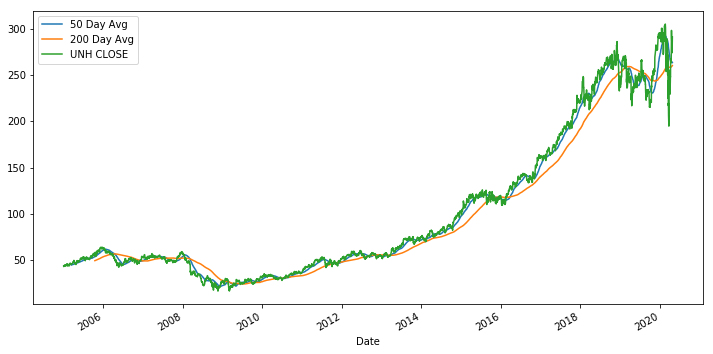

In [598]:
# daily, 50 day, 200 day stock closing price plot

plt.figure(figsize=(12,6))
UNH['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=50).mean().plot(label='50 Day Avg')
UNH['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=200).mean().plot(label='200 Day Avg')
UNH['Close'].ix['2005-01-01':'2020-04-24'].plot(label='UNH CLOSE')
plt.legend()

In [599]:
# ABBV ( gloden cross example)
ABBV = data.DataReader("ABBV", 'yahoo', start, end)

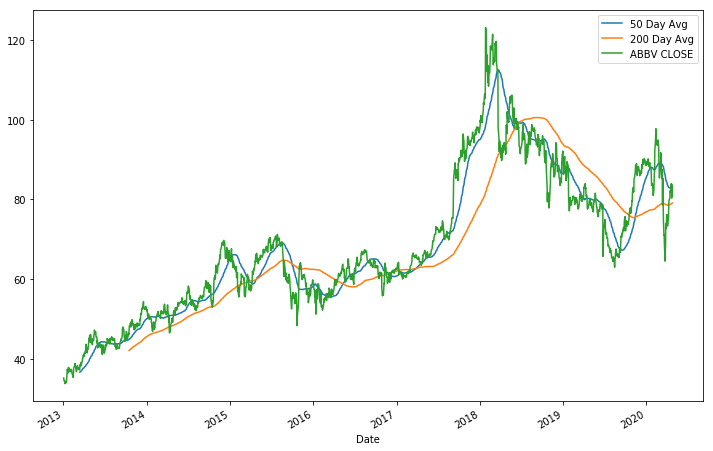

In [600]:
# checking the golden cross

plt.figure(figsize=(12,8))
_=ABBV['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=50).mean().plot(label='50 Day Avg')
_=ABBV['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=200).mean().plot(label='200 Day Avg')
_=ABBV['Close'].ix['2005-01-01':'2020-04-24'].plot(label='ABBV CLOSE')
_=plt.legend()

In [602]:
# S&P500 STOCK PRICE current comparison with pre covid 19 peak
((SPY.Close.loc['2020-06-05'] - SPY.Close.loc['2020-02-19'] )/ SPY.Close.loc['2020-02-19'])*100

-5.615652954321497

In [603]:
# MSFT  STOCK PRICE FALL AFTER covid 19
((JNJ.Close.loc['2020-06-05'] - JNJ.Close.loc['2020-02-19'] )/ JNJ.Close.loc['2020-02-19'])*100

-1.1011141149226324

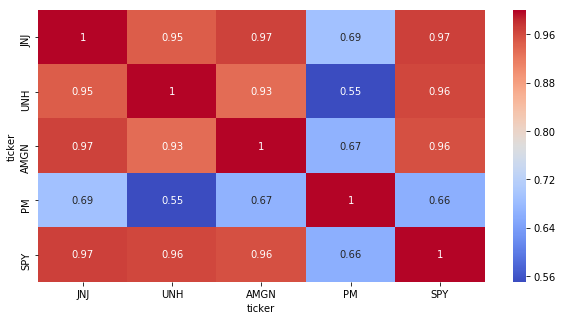

In [604]:
# stock price correlation 

plt.figure(figsize = (10,5))
sns.heatmap(my_stocks.xs(key='Close',axis=1,level='info').corr(),annot=True, cmap='coolwarm')

Most of the stocks are highly correlated as they are from pharmaceuticals industry

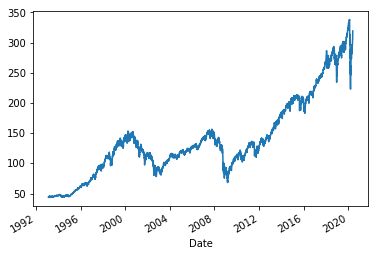

In [606]:
#SPY (S&P 500)
start = datetime.datetime(1990, 1, 1)
end =  datetime.datetime(2024, 4, 24)
SP500 = data.DataReader("SPY", 'yahoo',start,end)
pd.DataFrame(SP500).Close.plot()

A function to scrap the amount of dividend paid

Credit: https://medium.com/c%C3%B3digo-ecuador/python-web-scraping-yahoo-finance-stock-dividend-history-d9084c85c805




In [608]:
from datetime import datetime, timedelta
import time, requests, pandas, lxml
from lxml import html
def format_date(date_datetime):
     date_timetuple = date_datetime.timetuple()
     date_mktime = time.mktime(date_timetuple)
     date_int = int(date_mktime)
     date_str = str(date_int)
     return date_str
def subdomain(symbol, start, end):
     format_url = "{0}/history?period1={1}&period2={2}"    
     tail_url = "&interval=div%7Csplit&filter=div&frequency=1d"
     subdomain = format_url.format(symbol, start, end) + tail_url
     return subdomain
def header(subdomain):
     hdrs = {"authority": "finance.yahoo.com",
                "method": "GET",
                "path": subdomain,
                "scheme": "https",
                "accept": "text/html,application/xhtml+xml",
                "accept-encoding": "gzip, deflate, br",
                "accept-language": "en-US,en;q=0.9",
                "cache-control": "no-cache",
                "cookie": "cookies",
                "dnt": "1",
                "pragma": "no-cache",
                "sec-fetch-mode": "navigate",
                "sec-fetch-site": "same-origin",
                "sec-fetch-user": "?1",
                "upgrade-insecure-requests": "1",
                "user-agent": "Mozilla/5.0"}
     return hdrs
def scrape_page(url, header):
     page = requests.get(url, headers=header)
     element_html = html.fromstring(page.content)
     table = element_html.xpath('//table')
     table_tree = lxml.etree.tostring(table[0], method='xml')
     panda = pandas.read_html(table_tree)
     return panda
def clean_dividends(symbol, dividends):
     index = len(dividends)     
     dividends = dividends.drop(index-1)
     dividends = dividends.set_index('Date')
     dividends = dividends['Dividends']
     dividends = dividends.str.replace(r'\Dividend', '')
     dividends = dividends.astype(float)
     dividends.name = symbol
     return dividends

if __name__ == '__main__':
     
     symbol = "JNJ"     #create datetime objects
     start = datetime.today() - timedelta(days=9125)
     end = datetime.today()#properly format the date to epoch time
     start = format_date(start)
     end = format_date(end)#format the subdomain
     sub = subdomain(symbol, start, end)#customize the request header
     hdrs = header(sub)
     
     #concatenate the subdomain with the base URL
     base_url = "https://finance.yahoo.com/quote/"
     url = base_url + sub#scrape the dividend history table from Yahoo Finance
     dividends = scrape_page(url, hdrs)#clean the dividend history table
     clean_div = clean_dividends(symbol, dividends[0])

In [609]:
JNJ_div= pd.DataFrame(clean_div)
JNJ_div.columns = ['JNJ']

In [610]:
JNJ_div.head()

,JNJ
Date,
"May 22, 2020",1.01
"Feb 24, 2020",0.95
"Nov 25, 2019",0.95
"Aug 26, 2019",0.95
"May 24, 2019",0.95


In [614]:
dividend =JNJ_div.copy()
dividend.fillna(value=0,inplace=True)
dividend = dividend[dividend.JNJ !=0]
dividend.reset_index(inplace=True)
dividend['Date'] = pd.DatetimeIndex(dividend.Date)
dividend.sort_values('Date',ascending=True,inplace=True)
dividend.set_index('Date',inplace=True)
dividend_yearly = dividend.resample('y').sum()

Text(0, 0.5, 'Dividend ($) per share')

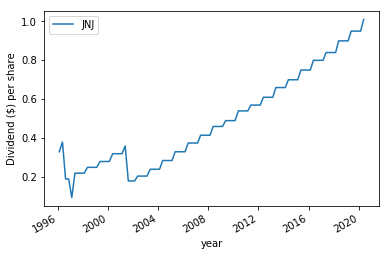

In [615]:
# qurterly paid dividends
_= dividend.plot()
plt.xlabel('year')
plt.ylabel('Dividend ($) per share')

In [619]:
tickers = ['JNJ','AMGN','UNH','PM','SPY']
for ticker in tickers:
    df1 = my_stocks[ticker]
    df1[ticker+'_pct_change'] = df1.Close.pct_change()
    df1.drop(labels=['High','Low', 'Open', 'Volume','Adj Close'],axis=1,inplace=True)
    df1.rename(columns={'Close':ticker+'_Close'},inplace=True)
    print('Autocorrelation of {} : {}'.format(ticker,df1[ticker+'_pct_change'].autocorr()))

Autocorrelation of JNJ : -0.08484178758149671
Autocorrelation of AMGN : -0.07641608133696344
Autocorrelation of UNH : -0.054231042396073625
Autocorrelation of PM : -0.07331084602639204
Autocorrelation of SPY : -0.12315886870076066


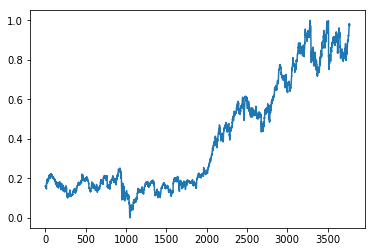

In [666]:
import datetime
from pandas_datareader import data, wb
ticker ='JNJ'
# Start and End date of the stock prices
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 6, 6)
df = data.DataReader(ticker, 'yahoo', start, end)
df_train = df.Close.loc['2005-01-01':'2019-12-31'].values
df_test = df.Close.loc['2020-01-01':'2024-05-31'].values
date_train = pd.date_range(start="2005-01-01",end="2019-12-31")
#scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train.reshape(-1,1))
_=plt.plot(df_train_scaled)

In [667]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

timestep =60

X_train = []
y_train = []
for i in range(timestep, 3775):
    X_train.append(df_train_scaled[i-timestep:i,0])
    y_train.append(df_train_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

# reshape
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#initiate LSTM layers

regressor = Sequential()

regressor.add(LSTM(units=100,return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = False))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience =1,min_delta=0.01)

regressor.fit(X_train,y_train,epochs=3,batch_size=64, callbacks=[early_stopping_monitor])


Epoch 1/3
3715/3715 [==============================] - 57s 15ms/step - loss: 0.0235
Epoch 2/3
3715/3715 [==============================] - 49s 13ms/step - loss: 0.0020
Epoch 3/3
3715/3715 [==============================] - 52s 14ms/step - loss: 0.0022


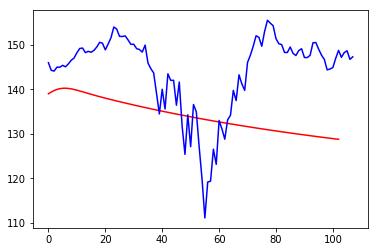

In [669]:
#prediction

# 5 months prediction
predicted_stock_price = []
df_train = df.Close.loc['2005-01-01':'2019-12-31']
X_for_prediction = df_train.iloc[-61:-1].values
X_for_prediction = sc.transform(X_for_prediction.reshape(-1,1))
for i in range(103):
    data = X_for_prediction[-60:]
    data = np.reshape(data, (1, len(data), 1))
    prediction = regressor.predict(data)
    predicted_stock_price.append(prediction[0][0])
    X_for_prediction = np.append(X_for_prediction, prediction, axis = 0)
predicted_stock_price2 = np.reshape(predicted_stock_price, (len(predicted_stock_price), 1))
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

# Plot Without test values for predcition
plt.plot(predicted_stock_price2,color='r')
_= plt.plot(df_test,color='B')



In [670]:
# MSE Without test values for predcition
from sklearn.metrics import mean_squared_error

#summary of the LSTM model
print('predicted price JNJ:', predicted_stock_price2[-1][0])
print ('MSE:', np.sqrt(mean_squared_error(predicted_stock_price2,df_test[:103])))
print(regressor.summary())


predicted price JNJ: 128.78554
MSE: 13.438706989327304
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 60, 100)           40800     
_________________________________________________________________
dropout_33 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_34 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_35 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_36 (LSTM)       

Epoch 1/3
3715/3715 [==============================] - 60s 16ms/step - loss: 0.0177
Epoch 2/3
3715/3715 [==============================] - 54s 15ms/step - loss: 0.0017
Epoch 3/3
3715/3715 [==============================] - 55s 15ms/step - loss: 0.0017


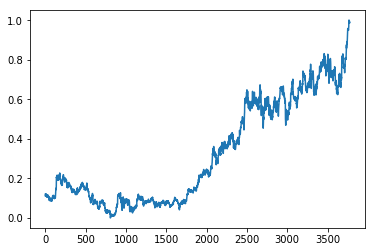

In [672]:
from pandas_datareader import data, wb
import datetime
ticker ='AMGN'
# Start and End date of the stock prices
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 6, 6)
df = data.DataReader(ticker, 'yahoo', start, end)
df_train = df.Close.loc['2005-01-01':'2019-12-31'].values
df_test = df.Close.loc['2020-01-01':'2024-05-31'].values
date_train = pd.date_range(start="2005-01-01",end="2019-12-31")
#scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train.reshape(-1,1))
_=plt.plot(df_train_scaled)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

timestep =60

X_train = []
y_train = []
for i in range(timestep, 3775):
    X_train.append(df_train_scaled[i-timestep:i,0])
    y_train.append(df_train_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

# reshape
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#initiate LSTM layers

regressor = Sequential()

regressor.add(LSTM(units=100,return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = False))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience =1,min_delta=0.01)

regressor.fit(X_train,y_train,epochs=3,batch_size=64, callbacks=[early_stopping_monitor])


predicted price AMGN: 219.30663
MSE: 16.014461810665228
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 60, 100)           40800     
_________________________________________________________________
dropout_37 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_38 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_39 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_40 (LSTM)      

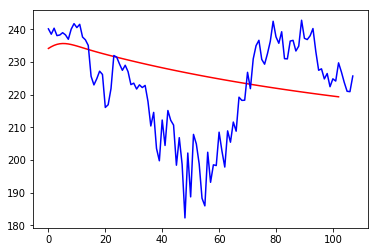

In [673]:
#prediction

# 5 months prediction
predicted_stock_price = []
df_train = df.Close.loc['2005-01-01':'2019-12-31']
X_for_prediction = df_train.iloc[-61:-1].values
X_for_prediction = sc.transform(X_for_prediction.reshape(-1,1))
for i in range(103):
    data = X_for_prediction[-60:]
    data = np.reshape(data, (1, len(data), 1))
    prediction = regressor.predict(data)
    predicted_stock_price.append(prediction[0][0])
    X_for_prediction = np.append(X_for_prediction, prediction, axis = 0)
predicted_stock_price2 = np.reshape(predicted_stock_price, (len(predicted_stock_price), 1))
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

# Plot Without test values for predcition
plt.plot(predicted_stock_price2,color='r')
_= plt.plot(df_test,color='B')

# MSE Without test values for predcition
from sklearn.metrics import mean_squared_error

#summary of the LSTM model
print('predicted price AMGN:', predicted_stock_price2[-1][0])
print ('MSE:', np.sqrt(mean_squared_error(predicted_stock_price2,df_test[:103])))
print(regressor.summary())


Epoch 1/3
3715/3715 [==============================] - 64s 17ms/step - loss: 0.0170
Epoch 2/3
3715/3715 [==============================] - 55s 15ms/step - loss: 0.0014
Epoch 3/3
3715/3715 [==============================] - 56s 15ms/step - loss: 0.0013


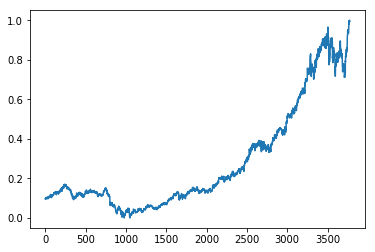

In [677]:
import datetime
from pandas_datareader import data, wb

ticker ='UNH'
# Start and End date of the stock prices
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 6, 6)
df = data.DataReader(ticker, 'yahoo', start, end)
df_train = df.Close.loc['2005-01-01':'2019-12-31'].values
df_test = df.Close.loc['2020-01-01':'2024-05-31'].values
date_train = pd.date_range(start="2005-01-01",end="2019-12-31")
#scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train.reshape(-1,1))
_=plt.plot(df_train_scaled)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

timestep =60

X_train = []
y_train = []
for i in range(timestep, 3775):
    X_train.append(df_train_scaled[i-timestep:i,0])
    y_train.append(df_train_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

# reshape
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#initiate LSTM layers

regressor = Sequential()

regressor.add(LSTM(units=100,return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = False))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience =1,min_delta=0.01)

regressor.fit(X_train,y_train,epochs=3,batch_size=64, callbacks=[early_stopping_monitor])


predicted price UNH: 215.39178
MSE: 44.01766012597412
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 60, 100)           40800     
_________________________________________________________________
dropout_45 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_46 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_47 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_48 (LSTM)        

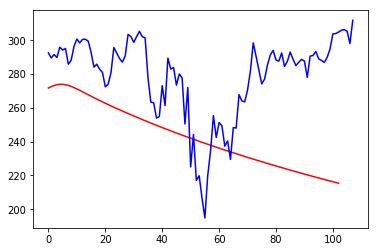

In [679]:
#prediction

# 5 months prediction
predicted_stock_price = []
df_train = df.Close.loc['2005-01-01':'2019-12-31']
X_for_prediction = df_train.iloc[-61:-1].values
X_for_prediction = sc.transform(X_for_prediction.reshape(-1,1))
for i in range(103):
    data = X_for_prediction[-60:]
    data = np.reshape(data, (1, len(data), 1))
    prediction = regressor.predict(data)
    predicted_stock_price.append(prediction[0][0])
    X_for_prediction = np.append(X_for_prediction, prediction, axis = 0)
predicted_stock_price2 = np.reshape(predicted_stock_price, (len(predicted_stock_price), 1))
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

# Plot Without test values for predcition
plt.plot(predicted_stock_price2,color='r')
_= plt.plot(df_test,color='B')

# MSE Without test values for predcition
from sklearn.metrics import mean_squared_error

#summary of the LSTM model
print('predicted price UNH:', predicted_stock_price2[-1][0])
print ('MSE:', np.sqrt(mean_squared_error(predicted_stock_price2,df_test[:103])))
print(regressor.summary())


Epoch 1/3
2910/2910 [==============================] - 56s 19ms/step - loss: 0.0270
Epoch 2/3
2910/2910 [==============================] - 47s 16ms/step - loss: 0.0032
Epoch 3/3
2910/2910 [==============================] - 47s 16ms/step - loss: 0.0029


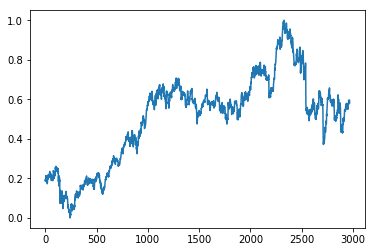

In [680]:
import datetime
from pandas_datareader import data, wb

ticker ='PM'
# Start and End date of the stock prices
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 6, 6)
df = data.DataReader(ticker, 'yahoo', start, end)
df_train = df.Close.loc['2005-01-01':'2019-12-31'].values
df_test = df.Close.loc['2020-01-01':'2024-05-31'].values
date_train = pd.date_range(start="2005-01-01",end="2019-12-31")
#scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train.reshape(-1,1))
_=plt.plot(df_train_scaled)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

timestep =60

X_train = []
y_train = []
for i in range(timestep, 2970):
    X_train.append(df_train_scaled[i-timestep:i,0])
    y_train.append(df_train_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

# reshape
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#initiate LSTM layers

regressor = Sequential()

regressor.add(LSTM(units=100,return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = False))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience =1,min_delta=0.01)

regressor.fit(X_train,y_train,epochs=3,batch_size=64, callbacks=[early_stopping_monitor])

predicted price PM: 75.18799
MSE: 6.087959513407994
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 60, 100)           40800     
_________________________________________________________________
dropout_49 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_50 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_50 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_51 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_51 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_52 (LSTM)          

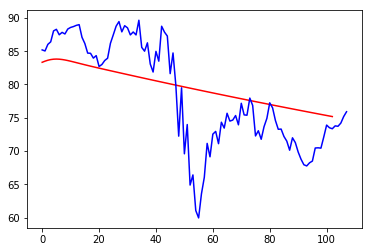

In [681]:
#prediction

# 5 months prediction
predicted_stock_price = []
df_train = df.Close.loc['2005-01-01':'2019-12-31']
X_for_prediction = df_train.iloc[-61:-1].values
X_for_prediction = sc.transform(X_for_prediction.reshape(-1,1))
for i in range(103):
    data = X_for_prediction[-60:]
    data = np.reshape(data, (1, len(data), 1))
    prediction = regressor.predict(data)
    predicted_stock_price.append(prediction[0][0])
    X_for_prediction = np.append(X_for_prediction, prediction, axis = 0)
predicted_stock_price2 = np.reshape(predicted_stock_price, (len(predicted_stock_price), 1))
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

# Plot Without test values for predcition
plt.plot(predicted_stock_price2,color='r')
_= plt.plot(df_test,color='B')

# MSE Without test values for predcition
from sklearn.metrics import mean_squared_error

#summary of the LSTM model
print('predicted price PM:', predicted_stock_price2[-1][0])
print ('MSE:', np.sqrt(mean_squared_error(predicted_stock_price2,df_test[:103])))
print(regressor.summary())


Epoch 1/3
3715/3715 [==============================] - 83s 22ms/step - loss: 0.0156
Epoch 2/3
3715/3715 [==============================] - 71s 19ms/step - loss: 0.0019
Epoch 3/3
3715/3715 [==============================] - 71s 19ms/step - loss: 0.0016


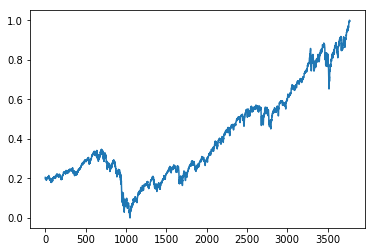

In [682]:
import datetime
from pandas_datareader import data, wb

ticker ='SPY'
# Start and End date of the stock prices
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 6, 6)
df = data.DataReader(ticker, 'yahoo', start, end)
df_train = df.Close.loc['2005-01-01':'2019-12-31'].values
df_test = df.Close.loc['2020-01-01':'2024-05-31'].values
date_train = pd.date_range(start="2005-01-01",end="2019-12-31")
#scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train.reshape(-1,1))
_=plt.plot(df_train_scaled)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

timestep =60

X_train = []
y_train = []
for i in range(timestep, 3775):
    X_train.append(df_train_scaled[i-timestep:i,0])
    y_train.append(df_train_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

# reshape
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#initiate LSTM layers

regressor = Sequential()

regressor.add(LSTM(units=100,return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences = False))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience =1,min_delta=0.01)

regressor.fit(X_train,y_train,epochs=3,batch_size=64, callbacks=[early_stopping_monitor])




predicted price SPY: 363.61276
MSE: 62.72599997417401
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 60, 100)           40800     
_________________________________________________________________
dropout_53 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_54 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_55 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_56 (LSTM)        

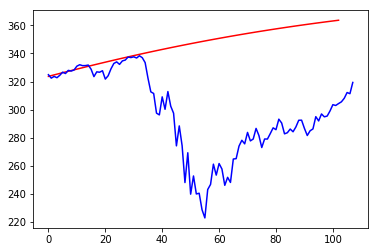

In [683]:
#prediction

# 5 months prediction
predicted_stock_price = []
df_train = df.Close.loc['2005-01-01':'2019-12-31']
X_for_prediction = df_train.iloc[-61:-1].values
X_for_prediction = sc.transform(X_for_prediction.reshape(-1,1))
for i in range(103):
    data = X_for_prediction[-60:]
    data = np.reshape(data, (1, len(data), 1))
    prediction = regressor.predict(data)
    predicted_stock_price.append(prediction[0][0])
    X_for_prediction = np.append(X_for_prediction, prediction, axis = 0)
predicted_stock_price2 = np.reshape(predicted_stock_price, (len(predicted_stock_price), 1))
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

# Plot Without test values for predcition
plt.plot(predicted_stock_price2,color='r')
_= plt.plot(df_test,color='B')

# MSE Without test values for predcition
from sklearn.metrics import mean_squared_error

#summary of the LSTM model
print('predicted price SPY:', predicted_stock_price2[-1][0])
print ('MSE:', np.sqrt(mean_squared_error(predicted_stock_price2,df_test[:103])))
print(regressor.summary())
